# Εργασία 1 + 2

## B. Αναγνώριση τύπων γυαλιού με βάση τη χημική τους σύσταση

### 1. Προετοιμασία των δεδομένων

Σκοπός της εργασίας είναι η αξιολόγηση μοντέλων τα οποία κατηγοριοποιούν μετρήσεις διαφόρων χημικών στοιχείων σε 6 τύπους γυαλιού. Τα δεδομένα αυτά είχαν συγκεντρωθεί με σκοπό να μπορεί να αναγνωριστεί ο τύπος του γυαλιού όταν αυτό συλλέγεται από τόπους εγκλήματος έτσι ωστέ να μπορεί να χρησιμοποιηθεί ως αποδεικτικό στοιχείο.


Παρακάτω βλέπουμε τις εκδόσεις της python και των βιβλιοθηκών που χρησιμοποιήθηκαν στην εργασία.

In [1]:
import matplotlib
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
import scipy
import sys

np.random.seed(0)

print('Python version:', sys.version)
print('scikit-learn version:', sklearn.__version__)
print('pandas version:', pd.__version__)
print('numpy version:', np.__version__)
print('matplotlib version:', matplotlib.__version__)
print('seaborn version:', sns.__version__)
print('scipy version:', scipy.__version__)

Python version: 3.7.9 (default, Aug 31 2020, 17:10:11) [MSC v.1916 64 bit (AMD64)]
scikit-learn version: 0.23.2
pandas version: 1.1.3
numpy version: 1.19.2
matplotlib version: 3.3.2
seaborn version: 0.11.0
scipy version: 1.5.2


Τα δεδομένα βρίσκονται στο αρχείο glass.data τα οποία διαβάζονται και αποθηκεύονται σε ένα pandas dataframe.

In [2]:
import numpy as np
import urllib.request
import os

np.random.seed(0)

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
filename = 'glass.data'

if not os.path.exists(filename):
    print('Downloading file...')
    urllib.request.urlretrieve(url, filename)
    print('Done.')

names = ("Id", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Type")
df = pd.read_csv(filename, names=names)

Παρακάτω βλέπουμε τα 5 πρώτα παραδείγματα.

In [3]:
df.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


Ακολουθεί περιγραφή των διαφόρων χαρακτηριστικών.

In [4]:
%%html
<style>
table {float:left}
</style>

|Id|Attribute|Description|
|:-|:-|:-|
|1|Id| Id number: 1 to 214|
|2|RI|refractive index
|3|Na|Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
|4|Mg|Magnesium
|5|Al|Aluminum
|6|Si|Silicon
|7|K|Potassium
|8|Ca|Calcium
|9|Ba|Barium
|10|Fe|Iron
|11|Type|Type of glass: (class attribute)

Ακολουθεί περιγραφή των κλάσεων. Η 4η κλάση δεν χρησιμοποιείται.

|Class|Description|
|:-|:-|
|1|building_windows_float_processed
|2|building_windows_non_float_processed
|3|vehicle_windows_float_processed
|4|vehicle_windows_non_float_processed (none in this database)
|5|containers
|6|tableware
|7|headlamps

Όλα τα χαρακτηριστικά είναι πραγματικοί αριθμοί εκτός από το Id και τη μεταβλητή στόχο Type οι οποίοι είναι ακέραιοι. Παρατηρούμε ότι δεν υπάρχουν τιμές που λείπουν.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      214 non-null    int64  
 1   RI      214 non-null    float64
 2   Na      214 non-null    float64
 3   Mg      214 non-null    float64
 4   Al      214 non-null    float64
 5   Si      214 non-null    float64
 6   K       214 non-null    float64
 7   Ca      214 non-null    float64
 8   Ba      214 non-null    float64
 9   Fe      214 non-null    float64
 10  Type    214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


Βγάζουμε εκτός του dataframe το Id γιατί είναι απλώς ένας αύξων αριθμός και δεν προσφέρει κάποια χρήσιμη πληροφορία για την κατηγοριοποίηση

In [6]:
df.drop(labels='Id', axis=1, inplace=True)

Το παρακάτω ιστόγραμμα μας δείχνει ότι οι κλάσεις των ψηφίων δεν είναι ζυγισμένες. 

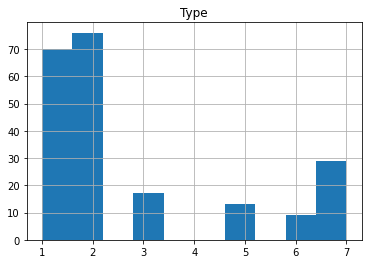

In [7]:
import matplotlib.pyplot as plt

df.hist(column='Type')
plt.show()

To dataset χωρίζεται σε training set (60%) και test set (40%) χρησιμοποιώντας την συνάρτηση StratifiedShuffleSplit η οποία μας εξασφαλίζει οτι η κατανομή στα δυο set θα είναι ίδια ως προς τη μεταβλητή στόχο.

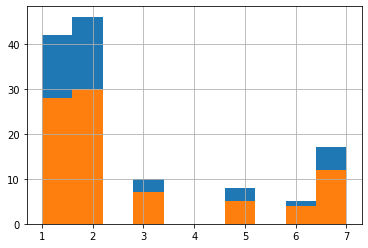

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.4, random_state=0)

for train_index, test_index in split.split(df, df['Type']):
    df_train = df.loc[train_index]
    df_test = df.loc[test_index]

df_train_x = df_train.drop('Type', axis=1)
df_train_y = df_train['Type']
df_test_x = df_test.drop('Type', axis=1)
df_test_y = df_test['Type']
    
df_train_y.hist()
df_test_y.hist()
plt.show()

Παρακάτω βλέπουμε κάποια στατιστικά δεδομένα για τις ανέξαρτητες μεταβλητές και την εξαρτημένη μεταβλητή Type.

In [9]:
df_train.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,128.000000,128.000000,128.00000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,1.518346,13.347344,2.63375,1.434531,72.693672,0.532500,9.016641,0.159531,0.057656,2.757812
std,0.003189,0.792129,1.46517,0.494346,0.832269,0.791642,1.401949,0.503831,0.096330,2.091400
min,1.511150,10.730000,0.00000,0.340000,69.810000,0.000000,6.470000,0.000000,0.000000,1.000000
25%,1.516525,12.885000,1.83250,1.190000,72.330000,0.137500,8.317500,0.000000,0.000000,1.000000
50%,1.517720,13.210000,3.45500,1.335000,72.845000,0.560000,8.605000,0.000000,0.000000,2.000000
75%,1.518985,13.702500,3.58250,1.620000,73.102500,0.600000,9.200000,0.000000,0.102500,3.000000
max,1.533930,17.380000,4.49000,3.040000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


Ακολουθούν ιστογράμματα των χαρακτηριστικών και το scatter matrix.

[]

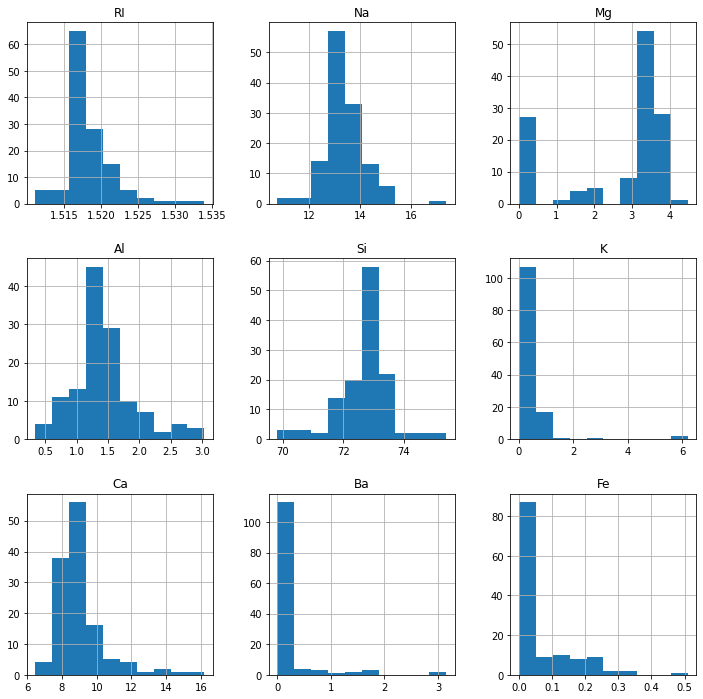

In [10]:
df_train_x.hist(figsize=(12, 12))
plt.plot()

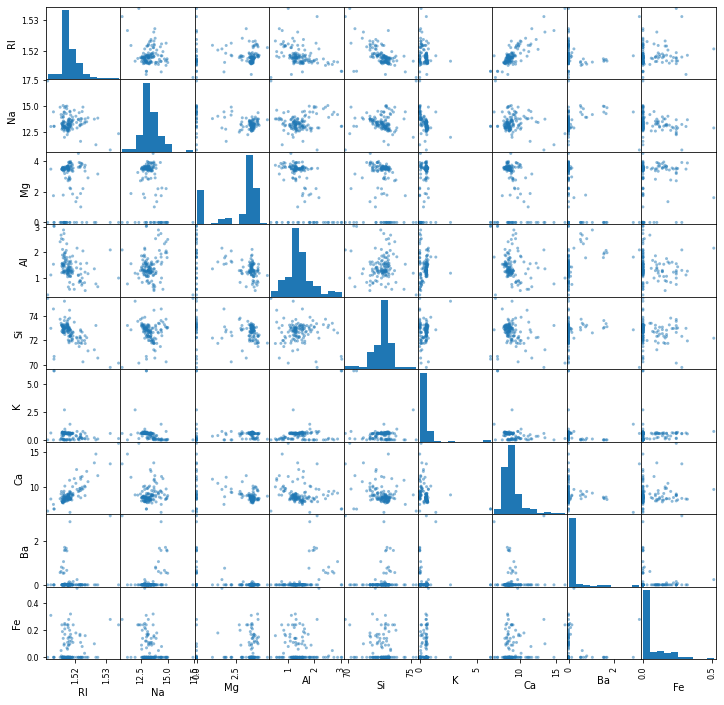

In [11]:
pd.plotting.scatter_matrix(df_train_x, figsize=(12, 12))
plt.show()

Το training set και το test set αποθηκεύονται σε numpy arrays.

In [12]:
x_train = df_train_x.to_numpy()
y_train = df_train_y.to_numpy()
x_test = df_test_x.to_numpy()
y_test = df_test_y.to_numpy()

print('x_train.shape =', x_train.shape)
print('y_train.shape =', y_train.shape)
print('x_test.shape =', x_test.shape)
print('y_test.shape =', y_test.shape)

x_train.shape = (128, 9)
y_train.shape = (128,)
x_test.shape = (86, 9)
y_test.shape = (86,)


### 2. Αξιολόγηση μοντέλων

#### 2.1 Περιγραφή της διαδικασίας

Επιλέγεται να γίνει αξιολόγηση των μοντέλων για την αναζήτηση των βέλτιστων παραμέτρων με την τεχνική της διασταυρωμένης επικύρωσης επειδή τα παραδείγματα είναι λίγα. Για την αξιολόγηση επιλέγεται η μετρική weighted F1 επειδή οι κλάσεις δεν είναι ζυγισμένες. Η συνάρτηση GridSearchCV εφαρμόζει 5-fold cross-validation και stratified shuffle split. Μετά απο κάθε split εφαρμόζεται κανονικοποίηση με τον StandardScaler και εκπαίδευση του classifier. Σε κάποια μοντέλα, πριν την εκπαίδευση classifier, εφαρμόζεται PCA ή kPCA + LDA. Όλα αυτά τα βήματα ομαδοποιούνται σε ένα pipeline. Όταν τελειώσει η διαδικασία του grid search δημιουργείται ένα διάγραμμα για το πώς αλλάζει το μέσο F1 ($\pm$std) στο training set και στο validation set καθώς αλλάζει μια παράμετρος και ένα αντίστοιχο διάγραμμα για τον χρόνο εκπαίδευσης. Επίσης στις περιπτώσεις που εφαρμόζεται PCA ή kPCA + LDA δημιουργούνται διαγράμματα των παραδειγμάτων στον χώρο των 2 πρώτων ιδιοδιανυσμάτων. Στο τέλος εκπαιδεύεται το βέλτιστο μοντέλο εκ νέου σε ολόκληρο το training set και αξιολογείται στο test set.

In [13]:
def plot_grid_search(search, pipeline, baseline_score_val, param1, xscale='linear'):  
    x = []
    mean_train_score = []
    mean_test_score = []
    mean_fit_time = []
    std_train_score = []
    std_test_score = []
    std_fit_time = []
    all_mean_train_score = search.cv_results_['mean_train_score']
    all_mean_test_score = search.cv_results_['mean_test_score']
    all_mean_fit_time = search.cv_results_['mean_fit_time']
    all_std_train_score = search.cv_results_['std_train_score']
    all_std_test_score = search.cv_results_['std_test_score']
    all_std_fit_time = search.cv_results_['std_fit_time']

    for i, params in enumerate(search.cv_results_['params']):
        skip = False
        for other_param, best_val in search.best_params_.items():
            if other_param == param1:
                continue
            if params[other_param] != best_val:
                skip = True
        if skip:
            continue   
        x.append(params[param1])
        mean_train_score.append(all_mean_train_score[i])
        mean_test_score.append(all_mean_test_score[i])
        mean_fit_time.append(all_mean_fit_time[i])
        std_train_score.append(all_std_train_score[i])
        std_test_score.append(all_std_test_score[i])
        std_fit_time.append(all_std_fit_time[i])

    mean_train_score = np.array(mean_train_score)
    mean_test_score = np.array(mean_test_score)
    mean_fit_time = np.array(mean_fit_time)
    std_train_score = np.array(std_train_score)
    std_test_score = np.array(std_test_score)
    std_fit_time = np.array(std_fit_time)

    param1_label = param1.split('__')[1]
    baseline_score = np.full(len(x), baseline_score_val)
    
    plt.title('Score')
    plt.plot(x, mean_train_score, label='Train')
    plt.fill_between(x, mean_train_score-std_train_score, mean_train_score+std_train_score, alpha=0.2)
    plt.plot(x, mean_test_score, label='Validation')
    plt.fill_between(x, mean_test_score-std_test_score, mean_test_score+std_test_score, alpha=0.2)
    plt.plot(x, baseline_score, label='Baseline', linestyle='dotted')
    plt.xscale(xscale)
    plt.xlabel(param1_label)
    plt.ylabel('F1')
    plt.legend()
    plt.show()
    
    plt.title('Training time')
    plt.plot(x, mean_fit_time)
    plt.fill_between(x, mean_fit_time-std_fit_time, mean_fit_time+std_fit_time, alpha=0.2)
    plt.xscale(xscale)
    plt.xlabel(param1_label)
    plt.ylabel('Time (sec)')
    plt.show()
    
    if 'pca' in pipeline.named_steps:
        new_pipeline = pipeline[:2]
        best_params = {}
        for param, val in search.best_params_.items():
            if 'scaler' in param or 'pca' in param:
                best_params[param] = val
        new_pipeline.set_params(**best_params)
        x_train_pca = new_pipeline.fit_transform(x_train, y_train)
        plt.title('After PCA')
        plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train, cmap='Set1', marker='+')
        plt.xlabel('1st eigenvector')
        plt.ylabel('2nd eigenvector')
        plt.colorbar()
        plt.show()
    
    if 'lda' in pipeline.named_steps:
        new_pipeline = pipeline[:3]
        best_params = {}
        for param, val in search.best_params_.items():
            if 'scaler' in param or 'pca' in param or 'lda' in param:
                best_params[param] = val
        new_pipeline.set_params(**best_params)
        x_train_lda = new_pipeline.fit_transform(x_train, y_train)
        plt.title('After LDA')
        plt.scatter(x_train_lda[:, 0], x_train_lda[:, 1], c=y_train, cmap='Set1', marker='+')
        plt.xlabel('1st eigenvector')
        plt.ylabel('2nd eigenvector')
        plt.colorbar()
        plt.show()
    
    if 'pca' in pipeline.named_steps or 'lda' in pipeline.named_steps:
        print('x_train.shape', x_train.shape)
    if 'pca' in pipeline.named_steps:
        print('x_train_pca.shape =', x_train_pca.shape)
    if 'lda' in pipeline.named_steps:
        print('x_train_lda.shape =', x_train_lda.shape)

In [14]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix
from time import time

final_results = []

def evaluate_model(classifier_str, search):
    y_pred = search.predict(x_test)
    y_train_pred = search.predict(x_train)
    
    train_f1 = f1_score(y_train, y_train_pred, average='weighted', zero_division=0)
    test_f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    print('Training time = {} sec'.format(search.refit_time_))
    print('Accuracy =', accuracy_score(y_test, y_pred))
    print('Precision =', precision_score(y_test, y_pred, average='weighted', zero_division=0))
    print('Recall =', recall_score(y_test, y_pred, average='weighted', zero_division=0))
    print('F1 =', test_f1)
    print('Training F1 =', train_f1)
    
    cm = confusion_matrix(y_test, y_pred, labels=range(1, 8))
    labels = [str(x) for x in range(1, 8)]
    sns.heatmap(cm, cmap="Oranges", annot=True, xticklabels=labels, yticklabels=labels)
    plt.title('Confusion matrix')
    plt.show()
    
    correct_indices = np.where(y_test == y_pred)[0]
    incorrect_indices = np.where(y_test != y_pred)[0]
    
    for i in correct_indices[:1]:
        print('Example of correct classification (y_pred = {}, y_test = {})'.format(y_pred[i], y_test[i]))
        print(df_test_x.iloc[i])
    print()
    for i in incorrect_indices[:1]:
        print('Example of misclassification (y_pred = {}, y_test = {})'.format(y_pred[i], y_test[i]))
        print(df_test_x.iloc[i])
    
    res = {
        'Classifier': classifier_str,
        'Training F1': "{:.4f}".format(train_f1),
        'Test F1': "{:.4f}".format(test_f1),
        'Training Time (sec)': "{:.5f}".format(search.refit_time_)
    }
    final_results.append(res)

#### 2.2 My kPCA

In [262]:
class MyKernelPCA(object):
    def __init__(self, kernel='linear', gamma=None, degree=3, coef0=1.0):
        self.kernel = kernel
        self.gamma = gamma
        self.degree = degree
        self.coef0 = coef0
        self.v = None
        self.w = None
        self.X_fit = None
        self.K_fit = None
    
    def set_params(self, **params):
        if not params:
            return self
        self.kernel = params.get('kernel', self.kernel)
        self.gamma = params.get('gamma', self.gamma)
        self.degree = params.get('degree', self.degree)
        self.coef0 = params.get('coef0', self.coef0)
        return self
    
    def _linear_kernel(self, X, Z):
        return X @ Z.T
    
    def _poly_kernel(self, X, Z):
        return (self.gamma*(X @ Z.T) + self.coef0)**self.degree

    def _rbf_kernel(self, X, Z):
        n = X.shape[0]
        m = Z.shape[0]
        XX = np.sum(X**2, 1).reshape(n, 1) @ np.ones((1, m))
        ZZ = np.sum(Z**2, 1).reshape(m, 1) @ np.ones((1, n))
        return np.exp(-self.gamma*(XX + ZZ.T - 2*(X @ Z.T)))
    
    def _kernel(self, X, Z):
        if self.kernel == 'linear':
            return self._linear_kernel(X, Z)
        elif self.kernel == 'poly':
            return self._poly_kernel(X, Z)
        elif self.kernel == 'rbf':
            return self._rbf_kernel(X, Z)
        else:
            raise Exception('Invalid kernel')
    
    def _centralize_K(self, K):
        m = K.shape[0]
        One = 1/m * np.ones((m, m))
        return K - One @ K - K @ One + One @ K @ One
    
    def _fix_eigenvalues(self, w):
        w = np.array(w)
        if w.dtype == np.float64:
            w[w < 1e-12] = 0.0
        else:
            w[w < 2e-7] = 0.0
        return w
    
    def fit(self, X, y=None):
        self.X_fit = X
        m, n = X.shape
        if self.kernel in ('poly', 'rbf'):
            if self.gamma is None:
                self.gamma = 1./n
        self.K_fit = self._kernel(X, X)
        K_new = self._centralize_K(self.K_fit)
        self.w, self.v = scipy.linalg.eigh(K_new)
        self.w = self._fix_eigenvalues(self.w)
        indices = self.w.argsort()[::-1]
        self.v = self.v[:, indices]
        self.w = self.w[indices]
        non_zeros = self.w > 0.0
        self.v = self.v[:, non_zeros]
        self.w = self.w[non_zeros]
        self.v = self.v/np.sqrt(self.w)
        return self
    
    def fit_transform(self, X, y=None):
        self.fit(X, y)
        return self.K_fit @ (self.v)
    
    def transform(self, X):
        K = self._kernel(X, self.X_fit)
        return K @ (self.v)

#### 2.2 Dummy Classifier

Ο Dummy Classifier χρησιμοποίεται ως ένα απλό baseline για τη σύγκριση με τα άλλα μοντέλα. Επιλέγει πάντα την πιο συχνή ετικέτα στο training set.

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', DummyClassifier(strategy='most_frequent', random_state=0))
])

t1 = time()
pipeline.fit(x_train, y_train)
t2 = time()
y_pred = pipeline.predict(x_test)
y_train_pred = pipeline.predict(x_train)

train_f1 = f1_score(y_train, y_train_pred, average='weighted', zero_division=0)
dummy_f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print('Training time = {} sec'.format(t2 - t1))
print('Accuracy =', accuracy_score(y_test, y_pred))
print('Precision =', precision_score(y_test, y_pred, average='weighted', zero_division=0))
print('Recall =', recall_score(y_test, y_pred, average='weighted', zero_division=0))
print('F1 =', dummy_f1)
print('Training F1 =', train_f1)

res = {
    'Classifier': 'Dummy Classifier',
    'Training F1': "{:.4f}".format(train_f1),
    'Test F1': "{:.4f}".format(dummy_f1),
    'Training Time (sec)': "{:.4f}".format(t2 - t1)
}
final_results.append(res)

Training time = 0.0009701251983642578 sec
Accuracy = 0.3488372093023256
Precision = 0.12168739859383451
Recall = 0.3488372093023256
F1 = 0.18043303929430635
Training F1 = 0.19001436781609196


#### 2.3 Linear SVM

Η βελτιστοποίηση του svm.SVC με linear kernel πραγματοποιείται ως προς την παράμετρο C.  Το C είναι η παράμετρος αντιστάθμισης μεταξύ της προσπάθειας για μέγιστο περιθώριο μεταξύ των κλάσεων και για ελάχιστο αριθμό λαθών.

$ Loss = \mathbf{w}^T\mathbf{w} + C\sum_{k=1}^R\varepsilon_{k}\ $

Kernel: $ K(\mathbf{x}, \mathbf{x}') = \langle\mathbf{x},\mathbf{x}'\rangle $

In [17]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SVC(kernel='linear'))
])

param_grid = {
    'clf__C': np.logspace(-3, 3)
}

search = GridSearchCV(pipeline, param_grid, n_jobs=-1, scoring='f1_weighted', return_train_score=True)
search.fit(x_train, y_train)

print('Best F1 =', search.best_score_)
print('Best params =', search.best_params_)

Best F1 = 0.562166648768291
Best params = {'clf__C': 1000.0}


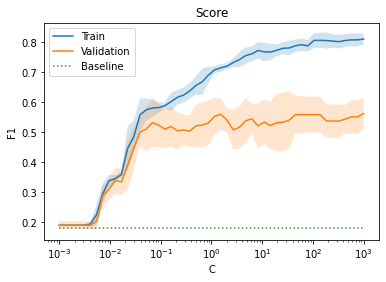

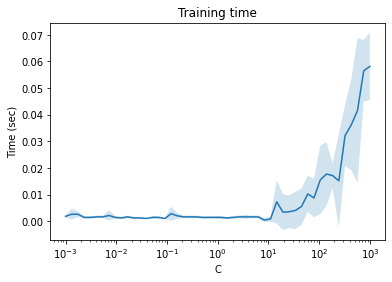

In [18]:
plot_grid_search(search, pipeline, dummy_f1, 'clf__C', xscale='log')

Training time = 0.27317380905151367 sec
Accuracy = 0.6162790697674418
Precision = 0.6309754521963824
Recall = 0.6162790697674418
F1 = 0.6208136620621322
Training F1 = 0.7624994206525769


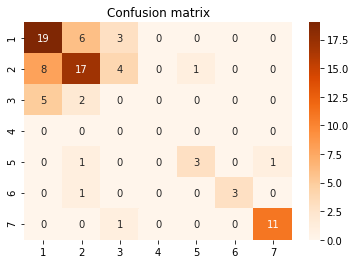

Example of correct classification (y_pred = 5, y_test = 5)
RI     1.52151
Na    11.03000
Mg     1.71000
Al     1.56000
Si    73.44000
K      0.58000
Ca    11.62000
Ba     0.00000
Fe     0.00000
Name: 166, dtype: float64

Example of misclassification (y_pred = 3, y_test = 2)
RI     1.51574
Na    14.86000
Mg     3.67000
Al     1.74000
Si    71.87000
K      0.16000
Ca     7.36000
Ba     0.00000
Fe     0.12000
Name: 70, dtype: float64


In [19]:
evaluate_model('Linear SVM', search)

#### 2.4 Polynomial SVM

Η βελτιστοποίηση του svm.SVC με polynomial kernel πραγματοποιείται ως προς τις παραμέτρους C και degree. Το degree είναι ο βαθμός του πολυωνύμου. Το gamma έχει την default τιμή 'scale' και υπολογίζεται ως gamma = 1/(n_features*X.var()).

Kernel: $ K(\mathbf{x}, \mathbf{x}') = (\gamma\langle\mathbf{x},\mathbf{x}'\rangle+r)^d $

In [20]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SVC(kernel='poly'))
])

param_grid = {
    'clf__C': np.logspace(-3, 3),
    'clf__degree': np.arange(2, 6)
}

search = GridSearchCV(pipeline, param_grid, n_jobs=-1, scoring='f1_weighted', return_train_score=True)
search.fit(x_train, y_train)

print('Best F1 =', search.best_score_)
print('Best params =', search.best_params_)

Best F1 = 0.6089593237515838
Best params = {'clf__C': 25.595479226995334, 'clf__degree': 2}


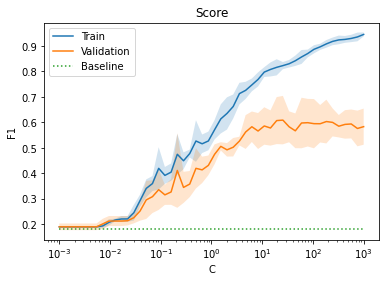

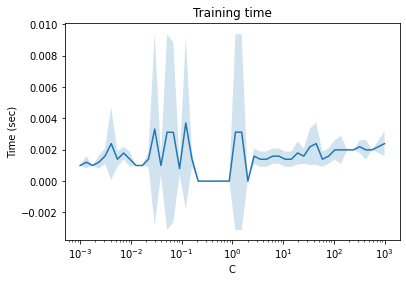

In [21]:
plot_grid_search(search, pipeline, dummy_f1, 'clf__C', xscale='log')

Training time = 0.000997304916381836 sec
Accuracy = 0.6511627906976745
Precision = 0.6433104960590279
Recall = 0.6511627906976745
F1 = 0.6457008609973274
Training F1 = 0.812219241308337


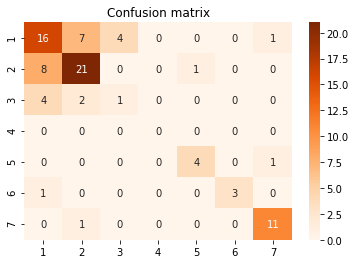

Example of correct classification (y_pred = 5, y_test = 5)
RI     1.52151
Na    11.03000
Mg     1.71000
Al     1.56000
Si    73.44000
K      0.58000
Ca    11.62000
Ba     0.00000
Fe     0.00000
Name: 166, dtype: float64

Example of misclassification (y_pred = 1, y_test = 3)
RI     1.51643
Na    12.16000
Mg     3.52000
Al     1.35000
Si    72.89000
K      0.57000
Ca     8.53000
Ba     0.00000
Fe     0.00000
Name: 149, dtype: float64


In [22]:
evaluate_model('Polynomial SVM', search)

#### 2.5 RBF SVM

Η βελτιστοποίηση του svm.SVC με rbf kernel πραγματοποιείται ως προς τις παραμέτρους C και gamma. Το gamma δείχνει πόσο μακριά φτάνει η επιρροή ενός παραδείγματος.

Kernel: $ K(\mathbf{x}, \mathbf{x}') = e^{-\gamma||\mathbf{x}-\mathbf{x}'||^2} $

In [23]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SVC(kernel='rbf'))
])

param_grid = {
    'clf__C': np.logspace(-3, 3),
    'clf__gamma': np.logspace(-3, 3)
}

search = GridSearchCV(pipeline, param_grid, n_jobs=-1, scoring='f1_weighted', return_train_score=True)
search.fit(x_train, y_train)

print('Best F1 =', search.best_score_)
print('Best params =', search.best_params_)

Best F1 = 0.6719561000403106
Best params = {'clf__C': 1000.0, 'clf__gamma': 0.004094915062380427}


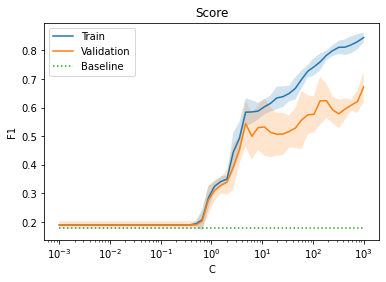

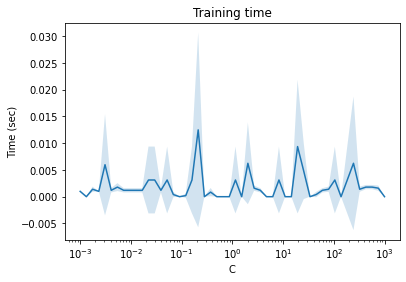

In [24]:
plot_grid_search(search, pipeline, dummy_f1, 'clf__C', xscale='log')

Training time = 0.0 sec
Accuracy = 0.5930232558139535
Precision = 0.6350626118067978
Recall = 0.5930232558139535
F1 = 0.6100036913990402
Training F1 = 0.8504118217054263


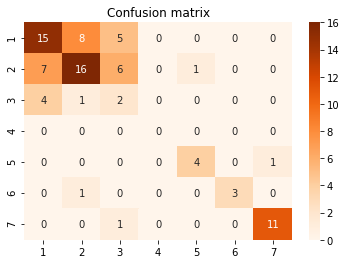

Example of correct classification (y_pred = 5, y_test = 5)
RI     1.52151
Na    11.03000
Mg     1.71000
Al     1.56000
Si    73.44000
K      0.58000
Ca    11.62000
Ba     0.00000
Fe     0.00000
Name: 166, dtype: float64

Example of misclassification (y_pred = 3, y_test = 2)
RI     1.51574
Na    14.86000
Mg     3.67000
Al     1.74000
Si    71.87000
K      0.16000
Ca     7.36000
Ba     0.00000
Fe     0.12000
Name: 70, dtype: float64


In [25]:
evaluate_model('RBF SVM', search)

#### 2.6 Sigmoid SVM

Η βελτιστοποίηση του svm.SVC με sigmoid kernel πραγματοποιείται ως προς τις παραμέτρους C και gamma.

Kernel: $ K(\mathbf{x}, \mathbf{x}') = tanh(\gamma\langle\mathbf{x},\mathbf{x}'\rangle+r) $

In [26]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SVC(kernel='sigmoid'))
])

param_grid = {
    'clf__C': np.logspace(-3, 3),
    'clf__gamma': np.logspace(-3, 3)
}

search = GridSearchCV(pipeline, param_grid, n_jobs=-1, scoring='f1_weighted', return_train_score=True)
search.fit(x_train, y_train)

print('Best F1 =', search.best_score_)
print('Best params =', search.best_params_)

Best F1 = 0.55287403747148
Best params = {'clf__C': 429.1934260128778, 'clf__gamma': 0.0030888435964774815}


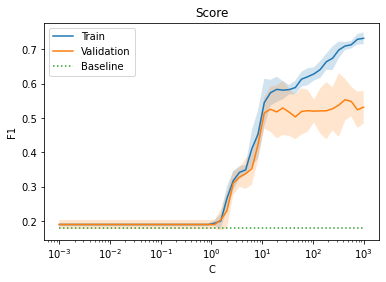

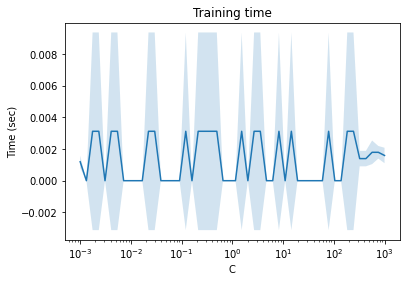

In [27]:
plot_grid_search(search, pipeline, dummy_f1, 'clf__C', xscale='log')

Training time = 0.0 sec
Accuracy = 0.6046511627906976
Precision = 0.5848484848484848
Recall = 0.6046511627906976
F1 = 0.5932523771336922
Training F1 = 0.6675103157867334


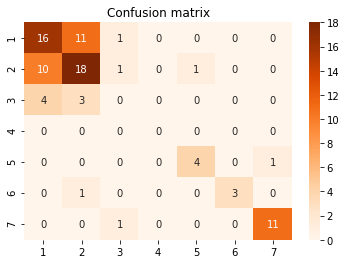

Example of correct classification (y_pred = 5, y_test = 5)
RI     1.52151
Na    11.03000
Mg     1.71000
Al     1.56000
Si    73.44000
K      0.58000
Ca    11.62000
Ba     0.00000
Fe     0.00000
Name: 166, dtype: float64

Example of misclassification (y_pred = 3, y_test = 2)
RI     1.51574
Na    14.86000
Mg     3.67000
Al     1.74000
Si    71.87000
K      0.16000
Ca     7.36000
Ba     0.00000
Fe     0.12000
Name: 70, dtype: float64


In [28]:
evaluate_model('Sigmoid SVM', search)

#### 2.7 Nearest Neighbors

Η βελτιστοποίηση του sklearn.neighbors.KNeighborsClassifier πραγματοποιείται ως προς τις παραμέτρους n_neighbors και p. Στον πολυδιάστατο χώρο των χαρακτηριστικών οι k πλησιέστεροι γείτονες του κάθε δείγματος ψηφίζουν για να αποφασίσουν την κλάση στην οποία ανήκει. Για να βρεθούν οι πλησιέστεροι γείτονες χρησιμοποιείται η απόσταση minkowski:

$d_p(\mathbf{x}, \mathbf{y}) = \sqrt[p]{\sum_{i}|x_i-y_i|^p}$

In [29]:
from sklearn.neighbors import KNeighborsClassifier

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', KNeighborsClassifier())
])

param_grid = {
    'clf__n_neighbors': np.arange(1, 11),
    'clf__p': np.arange(1, 4)
}

search = GridSearchCV(pipeline, param_grid, n_jobs=-1, scoring='f1_weighted', return_train_score=True)
search.fit(x_train, y_train)

print('Best F1 =', search.best_score_)
print('Best params =', search.best_params_)

Best F1 = 0.670555101554792
Best params = {'clf__n_neighbors': 1, 'clf__p': 1}


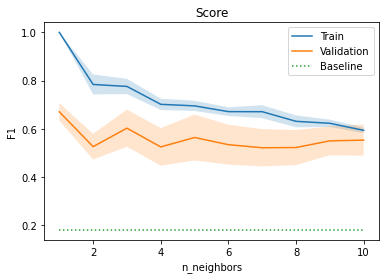

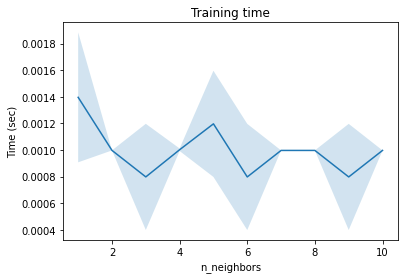

In [30]:
plot_grid_search(search, pipeline, dummy_f1, 'clf__n_neighbors')

Training time = 0.000997781753540039 sec
Accuracy = 0.7674418604651163
Precision = 0.7961630316281478
Recall = 0.7674418604651163
F1 = 0.779295525635795
Training F1 = 1.0


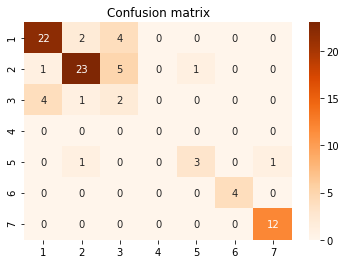

Example of correct classification (y_pred = 5, y_test = 5)
RI     1.52151
Na    11.03000
Mg     1.71000
Al     1.56000
Si    73.44000
K      0.58000
Ca    11.62000
Ba     0.00000
Fe     0.00000
Name: 166, dtype: float64

Example of misclassification (y_pred = 3, y_test = 1)
RI     1.5172
Na    13.3800
Mg     3.5000
Al     1.1500
Si    72.8500
K      0.5000
Ca     8.4300
Ba     0.0000
Fe     0.0000
Name: 24, dtype: float64


In [31]:
evaluate_model('Nearest Neighbors', search)

#### 2.8 PCA + Nearest Neighbors

Εφαρμόζεται κανονικοποίηση και μείωση των διαστάσεων με PCA διατηρώντας το 90% της διασποράς. Η βελτιστοποίηση του sklearn.neighbors.KNeighborsClassifier πραγματοποιείται ως προς τις παραμέτρους n_neighbors και p.

In [32]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.9, svd_solver='full')),
    ('clf', KNeighborsClassifier())
])

param_grid = {
    'clf__n_neighbors': np.arange(1, 11),
    'clf__p': np.arange(1, 4)
}

search = GridSearchCV(pipeline, param_grid, n_jobs=-1, scoring='f1_weighted', return_train_score=True)
search.fit(x_train, y_train)

print('Best F1 =', search.best_score_)
print('Best params =', search.best_params_)

Best F1 = 0.6494613849918197
Best params = {'clf__n_neighbors': 1, 'clf__p': 2}


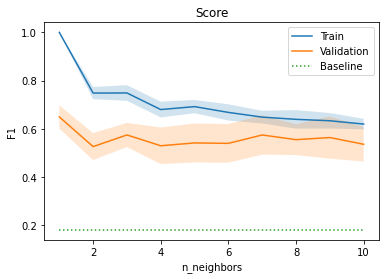

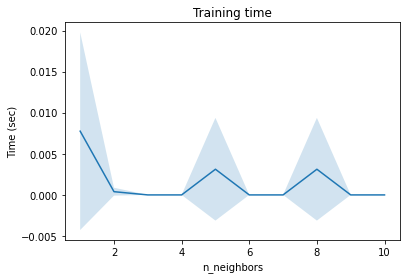

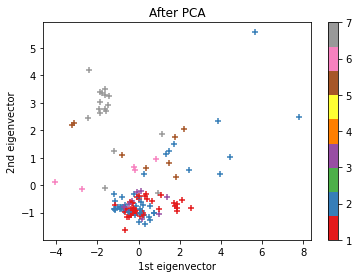

x_train.shape (128, 9)
x_train_pca.shape = (128, 6)


In [33]:
plot_grid_search(search, pipeline, dummy_f1, 'clf__n_neighbors')

Training time = 0.015623331069946289 sec
Accuracy = 0.627906976744186
Precision = 0.7004685468727431
Recall = 0.627906976744186
F1 = 0.6592144127271913
Training F1 = 1.0


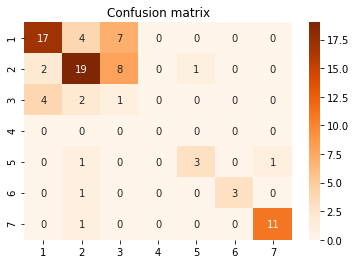

Example of correct classification (y_pred = 5, y_test = 5)
RI     1.52151
Na    11.03000
Mg     1.71000
Al     1.56000
Si    73.44000
K      0.58000
Ca    11.62000
Ba     0.00000
Fe     0.00000
Name: 166, dtype: float64

Example of misclassification (y_pred = 1, y_test = 3)
RI     1.51643
Na    12.16000
Mg     3.52000
Al     1.35000
Si    72.89000
K      0.57000
Ca     8.53000
Ba     0.00000
Fe     0.00000
Name: 149, dtype: float64


In [34]:
evaluate_model('PCA + Nearest Neighbors', search)

#### 2.9 Polynomial kPCA + LDA + Nearest Neighbors

In [35]:
from sklearn.decomposition import KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', KernelPCA(kernel='poly')),
    ('lda', LinearDiscriminantAnalysis()),
    ('clf', KNeighborsClassifier())
])

param_grid = {
    'pca__degree': np.arange(2, 6),
    'clf__n_neighbors': np.arange(1, 11),
    'clf__p': np.arange(1, 4)
}

search = GridSearchCV(pipeline, param_grid, n_jobs=-1, scoring='f1_weighted', return_train_score=True)
search.fit(x_train, y_train)

print('Best F1 =', search.best_score_)
print('Best params =', search.best_params_)

Best F1 = 0.6014028094368651
Best params = {'clf__n_neighbors': 3, 'clf__p': 2, 'pca__degree': 2}


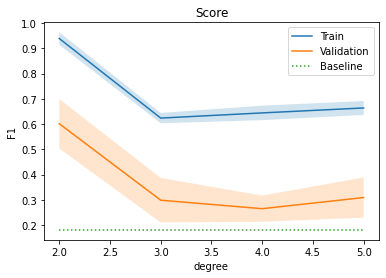

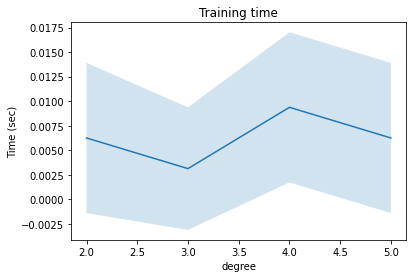

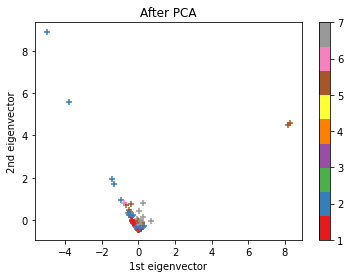

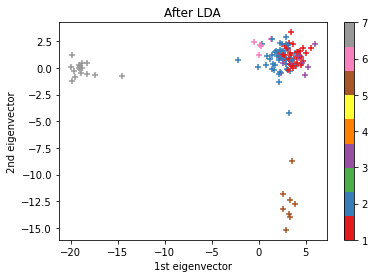

x_train.shape (128, 9)
x_train_pca.shape = (128, 54)
x_train_lda.shape = (128, 5)


In [36]:
plot_grid_search(search, pipeline, dummy_f1, 'pca__degree')

Training time = 0.022397518157958984 sec
Accuracy = 0.6395348837209303
Precision = 0.6425925925925926
Recall = 0.6395348837209303
F1 = 0.6391825229034532
Training F1 = 0.9066051136363638


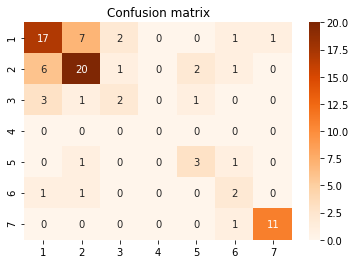

Example of correct classification (y_pred = 1, y_test = 1)
RI     1.5172
Na    13.3800
Mg     3.5000
Al     1.1500
Si    72.8500
K      0.5000
Ca     8.4300
Ba     0.0000
Fe     0.0000
Name: 24, dtype: float64

Example of misclassification (y_pred = 6, y_test = 5)
RI     1.52151
Na    11.03000
Mg     1.71000
Al     1.56000
Si    73.44000
K      0.58000
Ca    11.62000
Ba     0.00000
Fe     0.00000
Name: 166, dtype: float64


In [37]:
evaluate_model('Polynomial kPCA + LDA + Nearest Neighbors', search)

#### 2.10 My Polynomial kPCA + LDA + Nearest Neighbors

In [263]:
from sklearn.decomposition import KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', MyKernelPCA(kernel='poly')),
    ('lda', LinearDiscriminantAnalysis()),
    ('clf', KNeighborsClassifier())
])

param_grid = {
    'pca__degree': np.arange(2, 6),
    'clf__n_neighbors': np.arange(1, 11),
    'clf__p': np.arange(1, 4),
}

search = GridSearchCV(pipeline, param_grid, n_jobs=-1, scoring='f1_weighted', return_train_score=True) # FIXME n_jobs
search.fit(x_train, y_train)

print('Best F1 =', search.best_score_)
print('Best params =', search.best_params_)

Best F1 = 0.6014028094368651
Best params = {'clf__n_neighbors': 3, 'clf__p': 2, 'pca__degree': 2}


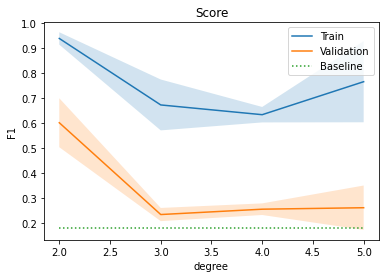

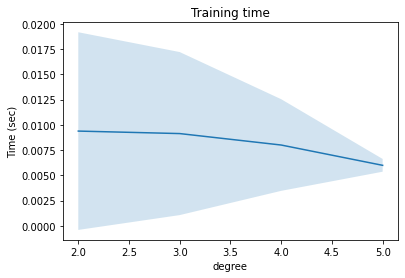

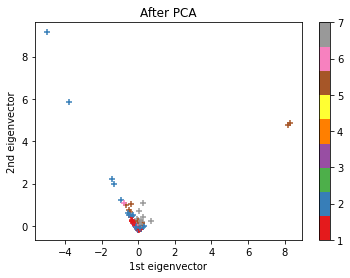

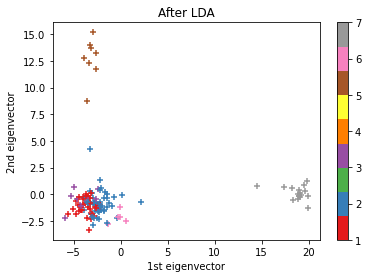

x_train.shape (128, 9)
x_train_pca.shape = (128, 54)
x_train_lda.shape = (128, 5)


In [264]:
plot_grid_search(search, pipeline, dummy_f1, 'pca__degree')

Training time = 0.0 sec
Accuracy = 0.6395348837209303
Precision = 0.6425925925925926
Recall = 0.6395348837209303
F1 = 0.6391825229034532
Training F1 = 0.9066051136363638


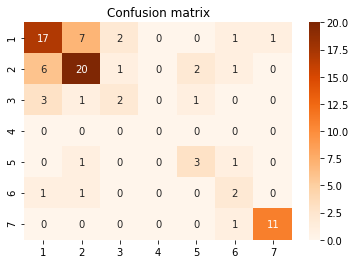

Example of correct classification (y_pred = 1, y_test = 1)
RI     1.5172
Na    13.3800
Mg     3.5000
Al     1.1500
Si    72.8500
K      0.5000
Ca     8.4300
Ba     0.0000
Fe     0.0000
Name: 24, dtype: float64

Example of misclassification (y_pred = 6, y_test = 5)
RI     1.52151
Na    11.03000
Mg     1.71000
Al     1.56000
Si    73.44000
K      0.58000
Ca    11.62000
Ba     0.00000
Fe     0.00000
Name: 166, dtype: float64


In [265]:
evaluate_model('My Polynomial kPCA + LDA + Nearest Neighbors', search)

#### 2.10 RBF kPCA + LDA + Nearest Neighbors

In [41]:
from sklearn.decomposition import KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', KernelPCA(kernel='rbf')),
    ('lda', LinearDiscriminantAnalysis()),
    ('clf', KNeighborsClassifier())
])

param_grid = {
    'pca__gamma': np.logspace(-3, 3),
    'clf__n_neighbors': np.arange(1, 11),
    'clf__p': np.arange(1, 4)
}

search = GridSearchCV(pipeline, param_grid, n_jobs=-1, scoring='f1_weighted', return_train_score=True)
search.fit(x_train, y_train)

print('Best F1 =', search.best_score_)
print('Best params =', search.best_params_)

Best F1 = 0.5358286256623956
Best params = {'clf__n_neighbors': 1, 'clf__p': 3, 'pca__gamma': 0.655128556859551}


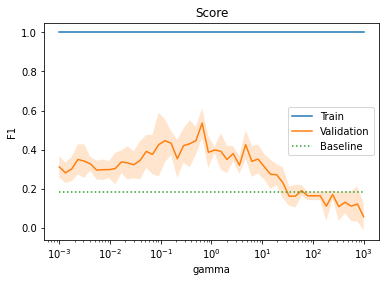

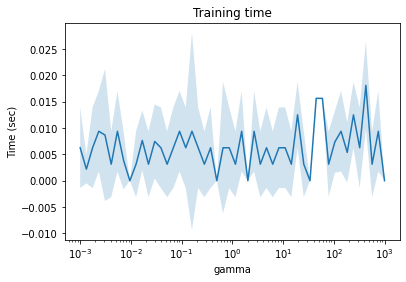

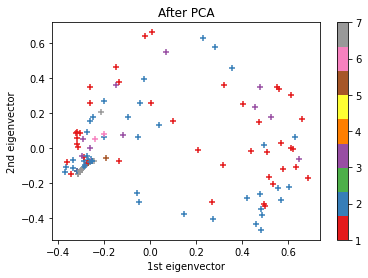

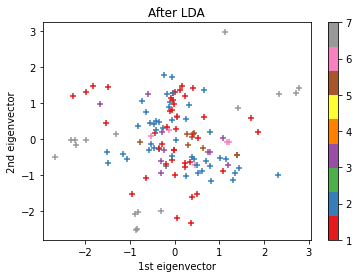

x_train.shape (128, 9)
x_train_pca.shape = (128, 127)
x_train_lda.shape = (128, 5)


In [42]:
plot_grid_search(search, pipeline, dummy_f1, 'pca__gamma', xscale='log')

Training time = 0.01396322250366211 sec
Accuracy = 0.45348837209302323
Precision = 0.5122055070071068
Recall = 0.45348837209302323
F1 = 0.45818767460705195
Training F1 = 1.0


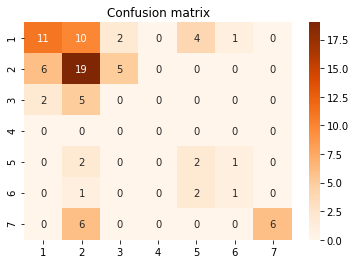

Example of correct classification (y_pred = 5, y_test = 5)
RI     1.51969
Na    12.64000
Mg     0.00000
Al     1.65000
Si    73.75000
K      0.38000
Ca    11.53000
Ba     0.00000
Fe     0.00000
Name: 167, dtype: float64

Example of misclassification (y_pred = 6, y_test = 5)
RI     1.52151
Na    11.03000
Mg     1.71000
Al     1.56000
Si    73.44000
K      0.58000
Ca    11.62000
Ba     0.00000
Fe     0.00000
Name: 166, dtype: float64


In [43]:
evaluate_model('RBF kPCA + LDA + Nearest Neighbors', search)

#### 2.11 Nearest Class Centroid

Η βελτιστοποίηση του sklearn.neighbors.NearestCentroid πραγματοποιείται ως προς το shrink_threshold. Κάθε κλάση αντιπροσωπεύεται απο το centroid των μελών της.

In [44]:
from sklearn.neighbors import NearestCentroid

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', NearestCentroid())
])

param_grid = {
    'clf__shrink_threshold': np.arange(0, 1.1, 0.01)
}

search = GridSearchCV(pipeline, param_grid, n_jobs=-1, scoring='f1_weighted', return_train_score=True)
search.fit(x_train, y_train)

print('Best F1 =', search.best_score_)
print('Best params =', search.best_params_)

Best F1 = 0.4863750869031544
Best params = {'clf__shrink_threshold': 1.01}


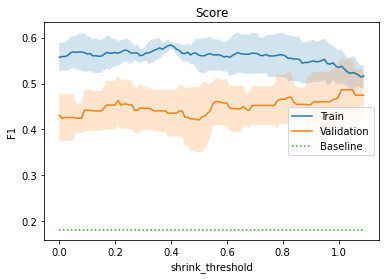

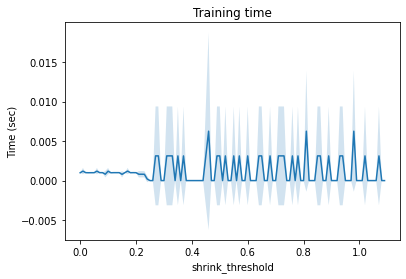

In [45]:
plot_grid_search(search, pipeline, dummy_f1, 'clf__shrink_threshold')

Training time = 0.0 sec
Accuracy = 0.5465116279069767
Precision = 0.5545056529913209
Recall = 0.5465116279069767
F1 = 0.5187895865098617
Training F1 = 0.5613355742228318


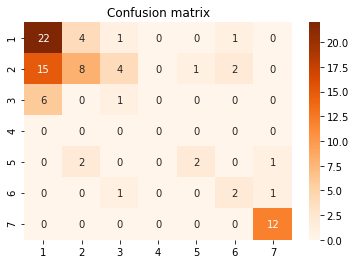

Example of correct classification (y_pred = 1, y_test = 1)
RI     1.5172
Na    13.3800
Mg     3.5000
Al     1.1500
Si    72.8500
K      0.5000
Ca     8.4300
Ba     0.0000
Fe     0.0000
Name: 24, dtype: float64

Example of misclassification (y_pred = 2, y_test = 5)
RI     1.52151
Na    11.03000
Mg     1.71000
Al     1.56000
Si    73.44000
K      0.58000
Ca    11.62000
Ba     0.00000
Fe     0.00000
Name: 166, dtype: float64


In [46]:
evaluate_model('Nearest Class Centroid', search)

#### 2.12 PCA + Nearest Class Centroid

Εφαρμόζεται κανονικοποίηση και μείωση των διαστάσεων με PCA διατηρώντας το 90% της διασποράς. Η βελτιστοποίηση του sklearn.neighbors.NearestCentroid πραγματοποιείται ως προς το shrink_threshold.

In [47]:
from sklearn.neighbors import NearestCentroid

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.9, svd_solver='full')),
    ('clf', NearestCentroid())
])

param_grid = {
    'clf__shrink_threshold': np.arange(0, 1.1, 0.01)
}

search = GridSearchCV(pipeline, param_grid, n_jobs=-1, scoring='f1_weighted', return_train_score=True)
search.fit(x_train, y_train)

print('Best F1 =', search.best_score_)
print('Best params =', search.best_params_)

Best F1 = 0.43217972751885797
Best params = {'clf__shrink_threshold': 0.97}


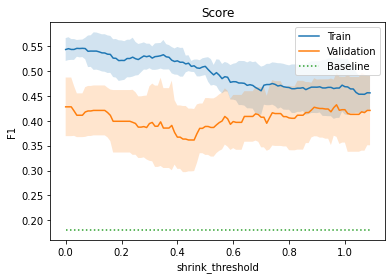

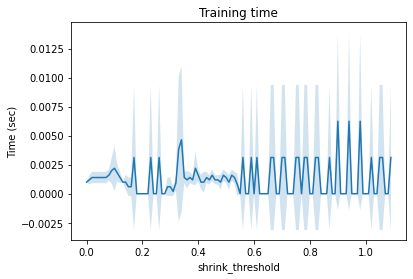

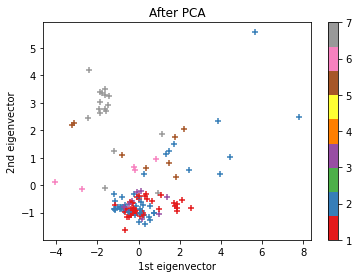

x_train.shape (128, 9)
x_train_pca.shape = (128, 6)


In [48]:
plot_grid_search(search, pipeline, dummy_f1, 'clf__shrink_threshold')

Training time = 0.0 sec
Accuracy = 0.4418604651162791
Precision = 0.4030095759233926
Recall = 0.4418604651162791
F1 = 0.40556446687075093
Training F1 = 0.4345977933511667


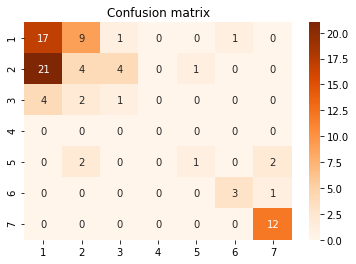

Example of correct classification (y_pred = 5, y_test = 5)
RI     1.52151
Na    11.03000
Mg     1.71000
Al     1.56000
Si    73.44000
K      0.58000
Ca    11.62000
Ba     0.00000
Fe     0.00000
Name: 166, dtype: float64

Example of misclassification (y_pred = 3, y_test = 2)
RI     1.51574
Na    14.86000
Mg     3.67000
Al     1.74000
Si    71.87000
K      0.16000
Ca     7.36000
Ba     0.00000
Fe     0.12000
Name: 70, dtype: float64


In [49]:
evaluate_model('PCA + Nearest Class Centroid', search)

#### 2.13 Polynomial kPCA + LDA + Nearest Class Centroid

In [50]:
from sklearn.neighbors import NearestCentroid

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', KernelPCA(kernel='poly')),
    ('lda', LinearDiscriminantAnalysis()),
    ('clf', NearestCentroid())
])

param_grid = {
    'pca__degree': np.arange(2, 6),
    'clf__shrink_threshold': np.arange(0, 1.1, 0.01)
}

search = GridSearchCV(pipeline, param_grid, n_jobs=-1, scoring='f1_weighted', return_train_score=True)
search.fit(x_train, y_train)

print('Best F1 =', search.best_score_)
print('Best params =', search.best_params_)

Best F1 = 0.5741139772508193
Best params = {'clf__shrink_threshold': 0.03, 'pca__degree': 2}


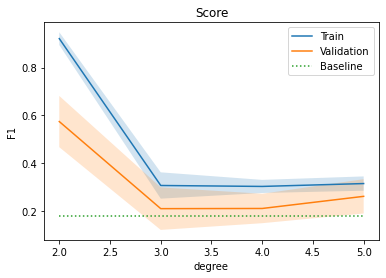

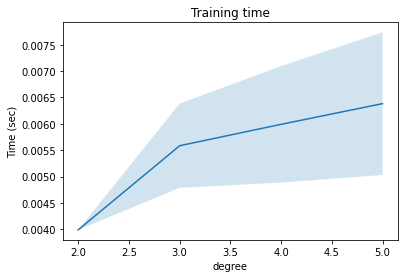

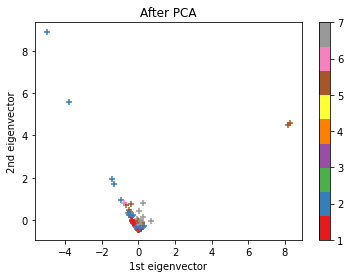

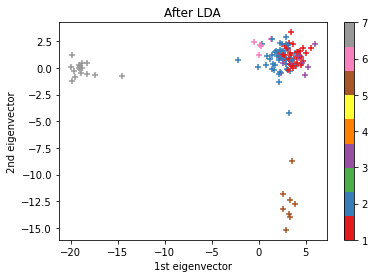

x_train.shape (128, 9)
x_train_pca.shape = (128, 54)
x_train_lda.shape = (128, 5)


In [51]:
plot_grid_search(search, pipeline, dummy_f1, 'pca__degree')

Training time = 0.004986286163330078 sec
Accuracy = 0.627906976744186
Precision = 0.6683717834759272
Recall = 0.627906976744186
F1 = 0.6311155538773573
Training F1 = 0.883018207282913


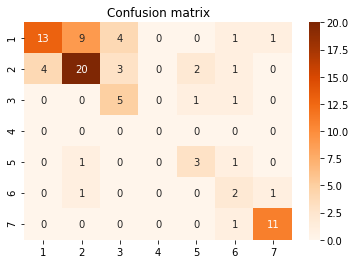

Example of correct classification (y_pred = 1, y_test = 1)
RI     1.5172
Na    13.3800
Mg     3.5000
Al     1.1500
Si    72.8500
K      0.5000
Ca     8.4300
Ba     0.0000
Fe     0.0000
Name: 24, dtype: float64

Example of misclassification (y_pred = 6, y_test = 5)
RI     1.52151
Na    11.03000
Mg     1.71000
Al     1.56000
Si    73.44000
K      0.58000
Ca    11.62000
Ba     0.00000
Fe     0.00000
Name: 166, dtype: float64


In [52]:
evaluate_model('Polynomial kPCA + Nearest Class Centroid', search)

#### 2.14 RBF kPCA + LDA + Nearest Class Centroid

In [53]:
from sklearn.neighbors import NearestCentroid

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', KernelPCA(kernel='rbf')),
    ('lda', LinearDiscriminantAnalysis()),
    ('clf', NearestCentroid())
])

param_grid = {
    'pca__gamma': np.logspace(-3, 3),
    'clf__shrink_threshold': np.arange(0, 1.1, 0.01)
}

search = GridSearchCV(pipeline, param_grid, n_jobs=-1, scoring='f1_weighted', return_train_score=True)
search.fit(x_train, y_train)

print('Best F1 =', search.best_score_)
print('Best params =', search.best_params_)

Best F1 = 0.3938644022644023
Best params = {'clf__shrink_threshold': 0.0, 'pca__gamma': 0.655128556859551}


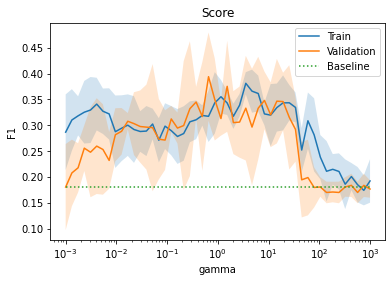

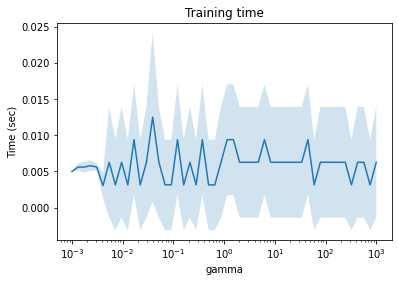

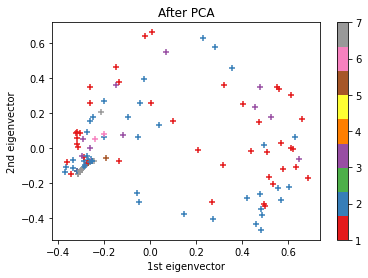

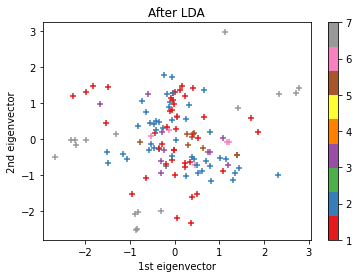

x_train.shape (128, 9)
x_train_pca.shape = (128, 127)
x_train_lda.shape = (128, 5)


In [54]:
plot_grid_search(search, pipeline, dummy_f1, 'pca__gamma', xscale='log')

Training time = 0.015621662139892578 sec
Accuracy = 0.43023255813953487
Precision = 0.6371587462082914
Recall = 0.43023255813953487
F1 = 0.4495964455918689
Training F1 = 0.3226832265238446


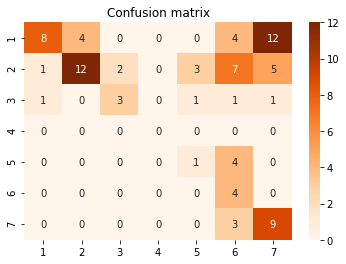

Example of correct classification (y_pred = 5, y_test = 5)
RI     1.52151
Na    11.03000
Mg     1.71000
Al     1.56000
Si    73.44000
K      0.58000
Ca    11.62000
Ba     0.00000
Fe     0.00000
Name: 166, dtype: float64

Example of misclassification (y_pred = 6, y_test = 2)
RI     1.51574
Na    14.86000
Mg     3.67000
Al     1.74000
Si    71.87000
K      0.16000
Ca     7.36000
Ba     0.00000
Fe     0.12000
Name: 70, dtype: float64


In [55]:
evaluate_model('RBF kPCA + Nearest Class Centroid', search)

### 4. Σύνοψη αποτελεσμάτων

In [56]:
final_results_df = pd.DataFrame(final_results)
final_results_df = final_results_df.style.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])
final_results_df.set_properties(**{'text-align': 'left'}).hide_index()

Classifier,Training F1,Test F1,Training Time (sec)
Dummy Classifier,0.1900,0.1804,0.0010
Linear SVM,0.7625,0.6208,0.26300
Polynomial SVM,0.8122,0.6457,0.00000
RBF SVM,0.8504,0.6100,0.00000
Sigmoid SVM,0.6675,0.5933,0.00000
Nearest Neighbors,1.0000,0.7793,0.00000
PCA + Nearest Neighbors,1.0000,0.6592,0.00000
Polynomial kPCA + LDA + Nearest Neighbors,0.9066,0.6392,0.03276
My Polynomial kPCA + LDA + Nearest Neighbors,0.9222,0.6567,0.00000
RBF kPCA + LDA + Nearest Neighbors,1.0000,0.4582,0.01396
